## 3.9.3 MPE_realworld

In [2]:
%load_ext autoreload 
%autoreload 2 
import usda.mpe_realworld  as usda_mpe
from usda.mpe_realworld.mpe import simple_realworld
from usda import datasets as usda_datasets
import usda.rl as usda_rl     

import gymnasium
import matplotlib.pyplot as plt
import mapclassify
import matplotlib
from IPython.display import HTML
import supersuit as ss

In [7]:
size=70
X_,_=usda_datasets.generate_categorical_2darray(size=size,sigma=3,seed=89)
X=X_[0].reshape(size,size)*size
X_BoxPlot=mapclassify.BoxPlot(X)
y=X_BoxPlot.yb.reshape(size,size)
y=y[:35,:]

In [8]:
levels = list(range(1,10))
clrs = ['#FFFFFF','#005ce6', '#3f8f76', '#ffffbe', '#3a5b0d', '#aaff00', '#e1e1e1','#F44336','#eeeee4']    
clrs_dict={1:'#000000',2:'#005ce6',3:'#3f8f76',4:'#ffffbe'}
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, clrs,extend='max')     

In [9]:
env=simple_realworld.env(render_mode="rgb_array",
            plat=y,
            plat_colors=clrs_dict,
            plat_rewards={1:-2,2:-5,3:0,4:1},
            )

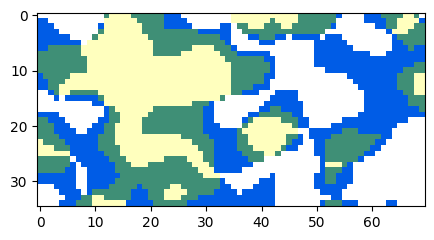

In [10]:
fig=plt.figure(figsize=(5,3))
plt.imshow(y,cmap=cmap,norm=norm)    
plt.show()

In [11]:
env=simple_realworld.parallel_env(render_mode="rgb_array",
            plat=y,
            plat_colors=clrs_dict,
            plat_rewards={1:-2,2:-5,3:0,4:1},
            )
#env = ss.black_death_v3(env)
env = ss.pettingzoo_env_to_vec_env_v1(env)

In [12]:
env = ss.concat_vec_envs_v1(env, 8, num_cpus=2, base_class="stable_baselines3")

In [13]:
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy

model = PPO(
    MlpPolicy,
    env,
    verbose=3,
    learning_rate=1e-3,
    batch_size=10,
)

Using cuda device


In [14]:
model.learn(total_timesteps=2)

------------------------------
| time/              |       |
|    fps             | 1540  |
|    iterations      | 1     |
|    time_elapsed    | 21    |
|    total_timesteps | 32768 |
------------------------------


In [17]:
env=simple_realworld.env(render_mode="rgb_array",
            plat=y,
            plat_colors=clrs_dict,
            plat_rewards={1:-2,2:-5,3:0,4:1},
            )

rewards = {agent: 0 for agent in env.possible_agents}
frames=[]
for i in range(1):
    env.reset(seed=i)
    
    for agent in env.agent_iter():
        frames.append(env.render())
        obs, reward, termination, truncation, info = env.last()
        for agent in env.agents:
            rewards[agent] += env.rewards[agent]
        if termination or truncation:
            break
        else:
            act = model.predict(obs, deterministic=True)[0]

        env.step(act)
env.close()
avg_reward = sum(rewards.values()) / len(rewards.values())
print("Rewards: ", rewards)
print(f"Avg reward: {avg_reward}")

Rewards:  {'agent_0': -19.52970732993723, 'agent_1': -35.62634151778042}
Avg reward: -27.578024423858825


In [18]:
anim=usda_rl.plot_animation(frames,interval=100)
#anim.save(filename="../imgs/3_9_c/waterworld_v4.gif")
HTML(anim.to_jshtml())

---

In [39]:
env.reset() # seed=578
frames=[]
for agent in env.agent_iter():
    frames.append(env.render())
    observation, reward, termination, truncation, info = env.last()   
    if termination or truncation:
        action = None
    else:
        # this is where you would insert your policy
        action = env.action_space(agent).sample()
    env.step(action)
env.close()    

In [40]:
anim=usda_rl.plot_animation(frames,interval=100)
#anim.save(filename="../graph/simple_realworld.gif", writer="pillow")
HTML(anim.to_jshtml())

In [3]:
from pettingzoo.sisl import waterworld_v4

env = waterworld_v4.parallel_env(render_mode="rgb_array")
env.reset()
env = ss.pettingzoo_env_to_vec_env_v1(env)
env = ss.concat_vec_envs_v1(env, 8, num_cpus=2, base_class="stable_baselines3")

In [20]:
from pettingzoo.mpe import simple_adversary_v3

env = simple_adversary_v3.parallel_env(render_mode="rgb_array")
env.reset()
env = ss.pettingzoo_env_to_vec_env_v1(env)
env = ss.concat_vec_envs_v1(env, 1, num_cpus=2, base_class="stable_baselines3")

AssertionError: observation spaces not consistent. Perhaps you should wrap with `supersuit.multiagent_wrappers.pad_observations_v0`?

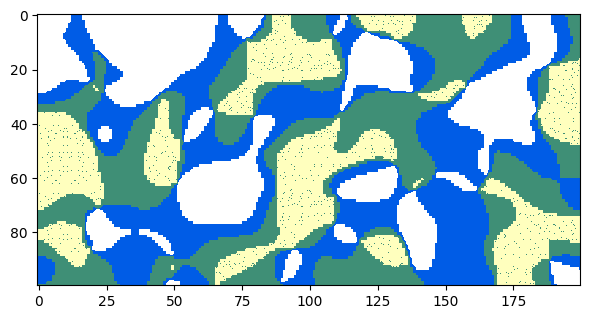

In [4]:
fig=plt.figure(figsize=(7,5))
plt.imshow(y,cmap=cmap,norm=norm)    
plt.show()